# Neural Network Introduction

## Neural network with bag of words

### Dataset conversion

In [3]:
import pandas as pd
from nltk.corpus import stopwords
import gensim
import numpy as np

def transformText(text):
    stops = set(stopwords.words("english"))
    # Convert text to lowercase
    text = text.lower()
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in stops]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation(text)
    # Strip all the numerics
    text = gensim.parsing.preprocessing.strip_numeric(text)
    # Removing all the words with < 3 characters
    text = gensim.parsing.preprocessing.strip_short(text, minsize=3)
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Stemming
    return gensim.parsing.preprocessing.stem_text(text)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
dataset=pd.read_csv("IMDB_Dataset.csv")
print(dataset.describe())
print(dataset['sentiment'].value_counts())

dataset['review'] = dataset['review'].map(transformText)

le = LabelEncoder()
le.fit(dataset['sentiment'])
dataset['sentiment']=le.transform(dataset['sentiment'])

dataset.to_csv("IMDB_Table.csv",index=False)

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### One hot encoding example

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

a=np.array(["black","white","black"])

le=LabelEncoder()
a_le=le.fit_transform(np.array(a))
print(a_le)
#We need to reshape a to apply one-hot encoding
a_reshaped = a.reshape(len(a), 1)
oh=OneHotEncoder()
a_oh=oh.fit_transform(a_reshaped)
print(a_oh)

[0 1 0]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0


### Data preparation

In [17]:
import pandas as pd

dataset=pd.read_csv("IMDB_Table.csv")

from sklearn.model_selection import train_test_split
X_trainAll, X_test, y_trainAll, y_test = train_test_split(dataset['review'], dataset['sentiment'],
                                                    test_size=0.10, random_state=10)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainAll, y_trainAll,
                                                          test_size=0.20, random_state=10)

#Build the counting corpus
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(min_df=30)
tfidf_transformer = TfidfTransformer()

X_train = count_vect.fit_transform(X_train)
X_train = tfidf_transformer.fit_transform(X_train).toarray()

X_valid=count_vect.transform(X_valid)
X_valid=tfidf_transformer.transform(X_valid).toarray()

X_test=count_vect.transform(X_test)
X_test=tfidf_transformer.transform(X_test).toarray()

### Creating the neural network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [20]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │       835,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845,701 (3.23 MB)

 Trainable params: 845,701 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [13]:
history = model.fit(X_train, y_train, epochs=10, verbose=True,
                    validation_data=(X_valid, y_valid), batch_size=10)


loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Epoch 1/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.8373 - loss: 0.3582 - val_accuracy: 0.8844 - val_loss: 0.2734
Epoch 2/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.9270 - loss: 0.1855 - val_accuracy: 0.8833 - val_loss: 0.2894
Epoch 3/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.9624 - loss: 0.1002 - val_accuracy: 0.8762 - val_loss: 0.4010
Epoch 4/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.9892 - loss: 0.0305 - val_accuracy: 0.8701 - val_loss: 0.7422
Epoch 5/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.8704 - val_loss: 1.1363
Epoch 6/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.8670 - val_loss: 1.4560
Epoch 7/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.8639 - val_loss: 1.3626
Epoch 8/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9998 - loss: 9

### Testing the model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 1.3043
Testing Accuracy:  0.8724


### Plotting stats

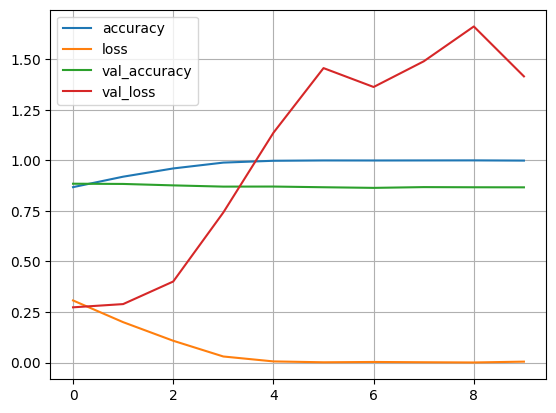

In [15]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

### Printing metrics

In [16]:
#Prediction metrics
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, verbose=1)
pred_threshold=0.5
print("Y pred",y_pred)
print("Y test",y_test)
y_pred_bool = [int(x+0.5) for [x] in y_pred]


print(y_pred_bool)
print(classification_report(y_test, y_pred_bool))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Y pred [[1.9156443e-02]
 [2.8617244e-05]
 [4.5612630e-01]
 ...
 [1.5820056e-17]
 [1.7394596e-01]
 [1.6769000e-26]]
Y test 27632    1
36119    0
4796     1
3648     1
24501    1
        ..
40551    1
40357    1
17041    0
23480    1
30522    0
Name: sentiment, Length: 5000, dtype: int64
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Saving checkpoint and early stopping

### Saving and restoring checkpoint

In [23]:
from tensorflow.keras import callbacks
from tensorflow.keras import models
checkpoint_cb = callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = models.load_model("my_keras_model.keras") # rollback to best model)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 3.4357e-07 - val_accuracy: 0.8664 - val_loss: 1.8650
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 1.8216e-07 - val_accuracy: 0.8676 - val_loss: 1.9103
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 1.2418e-07 - val_accuracy: 0.8671 - val_loss: 1.9566
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 1.0622e-07 - val_accuracy: 0.8673 - val_loss: 2.0020
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 1.0000 - loss: 4.6932e-08 - val_accuracy: 0.8669 - val_loss: 2.0482
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 3.4664e-08 - val_accuracy: 0.8676 - val_loss: 2.0944
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 1.9174e-08 - val_accuracy: 0.8679 - val_loss: 2.1399
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step

### Early stopping

In [25]:
checkpoint_cb = callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 2.0716e-07 - val_accuracy: 0.8671 - val_loss: 1.9102
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 1.0000 - loss: 1.4703e-07 - val_accuracy: 0.8668 - val_loss: 1.9554
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 8.1429e-08 - val_accuracy: 0.8667 - val_loss: 2.0020
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 4.2922e-08 - val_accuracy: 0.8672 - val_loss: 2.0489
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 1.0000 - loss: 2.5941e-08 - val_accuracy: 0.8667 - val_loss: 2.0957
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 1.0000 - loss: 1.6401e-08 - val_accuracy: 0.8671 - val_loss: 2.1406


## Dropout

In [21]:
model = Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_13 (Dropout)            │ (None, 8354)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │       835,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845,701 (3.23 MB)

 Trainable params: 845,701 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras import callbacks
from tensorflow.keras import models
checkpoint_cb = callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7778 - loss: 0.4491 - val_accuracy: 0.8871 - val_loss: 0.2725
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8847 - loss: 0.2775 - val_accuracy: 0.8869 - val_loss: 0.2701
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8996 - loss: 0.2444 - val_accuracy: 0.8881 - val_loss: 0.2726
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9158 - loss: 0.2098 - val_accuracy: 0.8880 - val_loss: 0.2753
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9272 - loss: 0.1880 - val_accuracy: 0.8860 - val_loss: 0.2779
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9378 - loss: 0.1611 - val_accuracy: 0.8869 - val_loss: 0.2852
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9467 - loss: 0.1421 - val_accuracy: 0.8858 - val_loss: 0.3115


### Testing and plotting stats

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8840 - loss: 0.2615
Testing Accuracy:  0.8872


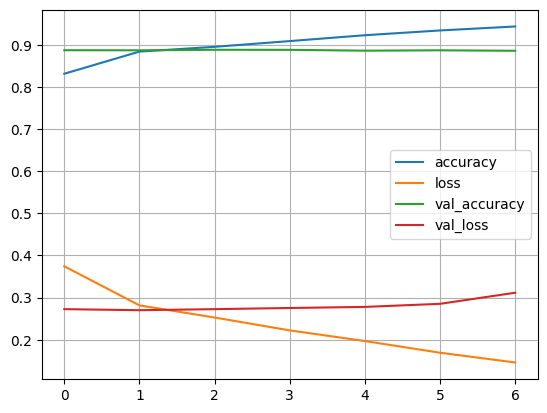

In [15]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

## Toward a deep neural network

In [23]:
model = Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dropout(0.5))
numHiddenLayers=3
numNodes=500
for i in range(0,numHiddenLayers):
    model.add(layers.Dense(numNodes, activation='relu'))
    model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

checkpoint_cb = callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb],batch_size=20)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 8354)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 500)            │     4,177,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,679,001 (17.85 MB)

 Trainable params: 4,679,001 (17.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 93s 51ms/step - accuracy: 0.7600 - loss: 0.4835 - val_accuracy: 0.8787 - val_loss: 0.2871
Epoch 2/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 97s 54ms/step - accuracy: 0.8479 - loss: 0.3502 - val_accuracy: 0.8860 - val_loss: 0.2836
Epoch 3/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 98s 55ms/step - accuracy: 0.8562 - loss: 0.3326 - val_accuracy: 0.8861 - val_loss: 0.2781
Epoch 4/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 97s 54ms/step - accuracy: 0.8661 - loss: 0.3126 - val_accuracy: 0.8860 - val_loss: 0.2916
Epoch 5/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 95s 53ms/step - accuracy: 0.8785 - loss: 0.2935 - val_accuracy: 0.8881 - val_loss: 0.2795
Epoch 6/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 88s 49ms/step - accuracy: 0.8863 - loss: 0.2803 - val_accuracy: 0.8884 - val_loss: 0.2810
Epoch 7/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 92s 51ms/step - accuracy: 0.8963 - loss: 0.2616 - val_accuracy: 0.8868 - val_loss: 0.2768
Epoch 8/100
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 93s 52ms/step - accuracy: 

### Testing and plotting results

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8874 - loss: 0.2645
Testing Accuracy:  0.8882


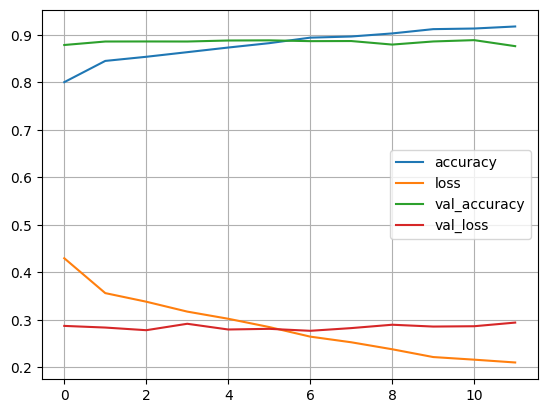

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()